In [ ]:
%pip install yfinance
%pip install matplotlib

In [4]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [8]:
def compare_stock_performance(stock1_name, stock2_name):
    """
    Fetches data for 2 stocks by their ticker symbols and plots their performance.

    Parameters:
        stock1_name (str): Ticker symbol for the first stock (e.g., "AAPL").
        stock2_name (str): Ticker symbol for the second stock (e.g., "AMZN").
    """

    # Loading 1st Stock data using YF API
    stock1 = yf.Ticker('AAPL')
    # Loading the share price data
    stock1_data = stock1.history(period="10y")
    # Resetting the index
    stock1_data.reset_index(inplace=True)


    # Loading 2nd Stock data
    stock2 = yf.Ticker('AMZN')
    # Loading sharep price data
    stock2_data = stock2.history(period="10y")
    # Resetting index
    stock2_data.reset_index(inplace=True)


    # Plot Open Prices for both stocks
    plt.figure(figsize=(12, 6))
    
    plt.plot(stock1_data['Date'], stock1_data['Open'], label=stock1_name, color='black', alpha=0.7)
    plt.plot(stock2_data['Date'], stock2_data['Open'], label=stock2_name, color='orange', alpha=0.7)
    
    # Title, labels, and legend
    plt.title(f'{stock1_name} vs {stock2_name} -  Stock Performance post 2010', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Open Price ($)', fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    # Display the plot
    plt.show()

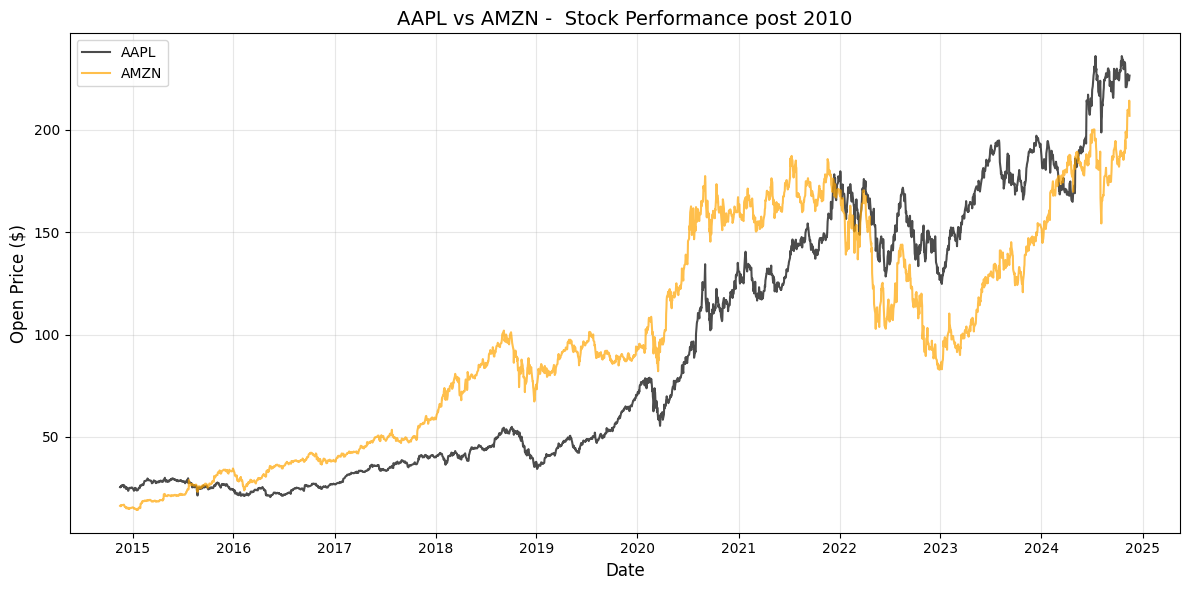

In [9]:
compare_stock_performance('AAPL','AMZN')

## HTML Revenue Data

In [ ]:
# Reading revenue data from html
amzn_revenue_data = pd.read_html('https://www.macrotrends.net/stocks/charts/AMZN/amazon/revenue')
# Accessing the 2nd table
amzn_revenue_data = amzn_revenue_data[1]
# Renaming the columns
amzn_revenue_data.columns = ['Date','Revenue']
# Replacing string characters and changing the data type to float
amzn_revenue_data['Revenue']=amzn_revenue_data['Revenue'].replace('[$,]','', regex=True).astype(float)
# Dropping N/A values
amzn_revenue_data.dropna(inplace=True)
# Displaying bottom 5
amzn_revenue_data.tail()